# forcasting of dry or wet day of 1969 using 68 years of data of kanpur city

IMPORTING THE LIBRARIES

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

IMPORTING CSV FILE AND CONVERTING THE PRECIPITATION DATA INTO STATE FORM

In [3]:

df2=pd.read_csv(r'C:\Users\gopal\Desktop\kanpur.csv')
df2["prec"]=df2['PRCP']/10
df2['state']=0
for stat in range(len(df2['state'])):
    if df2['prec'][stat]<=1:
        df2['state'][stat]=0
    else:
        df2['state'][stat]=1
a1=[]
for i in range(31):
    
    a1.append(df2['state'][i])
a1

<ipython-input-3-c58266043705>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['state'][stat]=1
<ipython-input-3-c58266043705>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['state'][stat]=0


[1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

In [14]:
df2.shape

(23935, 13)

In [16]:
df2

,DATE,LATITUDE,LONGITUDE,ELEVATION,NAME,PRCP,PRCP_ATTRIBUTES,Unnamed: 7,Day,Month,Year,prec,state
0,01-01-1901,26.47,80.35,185,"KANPUR, IN",53,",,I",NaN,1,1,1901,5.3,1
1,02-01-1901,26.47,80.35,185,"KANPUR, IN",0,",,I",NaN,2,1,1901,0.0,0
2,03-01-1901,26.47,80.35,185,"KANPUR, IN",0,",,I",NaN,3,1,1901,0.0,0
3,04-01-1901,26.47,80.35,185,"KANPUR, IN",0,",,I",NaN,4,1,1901,0.0,0
4,05-01-1901,26.47,80.35,185,"KANPUR, IN",0,",,I",NaN,5,1,1901,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23930,27-12-1968,26.47,80.35,185,"KANPUR, IN",0,",,I",NaN,27,12,1968,0.0,0
23931,28-12-1968,26.47,80.35,185,"KANPUR, IN",0,",,I",NaN,28,12,1968,0.0,0
23932,29-12-1968,26.47,80.35,185,"KANPUR, IN",0,",,I",NaN,29,12,1968,0.0,0
23933,30-12-1968,26.47,80.35,185,"KANPUR, IN",0,",,I",NaN,30,12,1968,0.0,0


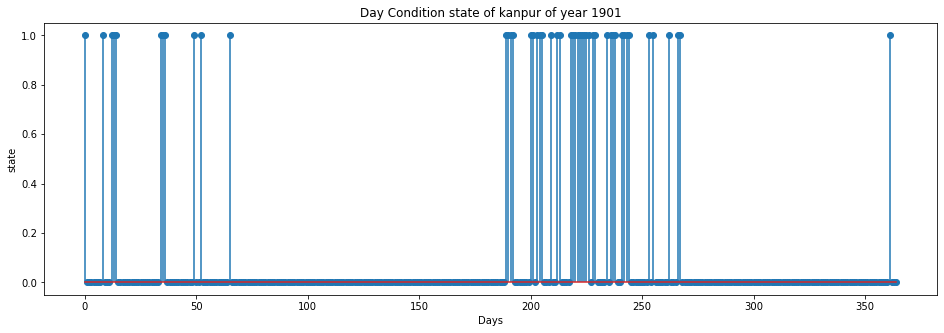

In [35]:
plt.figure(figsize=(16,5))
plt.stem(df2['state'][0:365], use_line_collection = True)
plt.title('Day Condition state of kanpur of year 1901')
plt.xlabel("Days")
plt.ylabel('state')
plt.show()

In [20]:
df2.isnull().sum() #CHECKING THE NULL VALUES

DATE                   0
LATITUDE               0
LONGITUDE              0
ELEVATION              0
NAME                   0
PRCP                   0
PRCP_ATTRIBUTES        0
Unnamed: 7         23935
Day                    0
Month                  0
Year                   0
prec                   0
state                  0
dtype: int64

In [25]:
df2.columns.str.match("Unnamed")         #CLEANING OF THE DATA
df2.loc[:,~df2.columns.str.match("Unnamed")]
df2.isnull().sum()

DATE               0
LATITUDE           0
LONGITUDE          0
ELEVATION          0
NAME               0
PRCP               0
PRCP_ATTRIBUTES    0
Day                0
Month              0
Year               0
prec               0
state              0
dtype: int64

# CALCULATION OF TRANSITION PROBABILITY MATRIX

In [26]:
#3.b
def transition_matrix(transitions):
    n = 1+ max(transitions) #number of states

    M = [[0]*n for _ in range(n)]

    for (i,j) in zip(transitions,transitions[1:]):
        M[i][j] += 1

    #now convert to probabilities:
    for row in M:
        s = sum(row)
        if s > 0:
            row[:] = [f/s for f in row]
    return M
for i in range(1,13):
    
    t = df2[df2['Month']==i]['state']
    m = transition_matrix(t)
    print('The transition probability matrix of month:',i)
    for row in m: print(' '.join('{0:.2f}'.format(x) for x in row))

The transition probability matrix of month: 1
0.95 0.05
0.75 0.25
The transition probability matrix of month: 2
0.95 0.05
0.73 0.27
The transition probability matrix of month: 3
0.97 0.03
0.78 0.22
The transition probability matrix of month: 4
0.98 0.02
0.70 0.30
The transition probability matrix of month: 5
0.97 0.03
0.90 0.10
The transition probability matrix of month: 6
0.90 0.10
0.64 0.36
The transition probability matrix of month: 7
0.68 0.32
0.42 0.58
The transition probability matrix of month: 8
0.66 0.34
0.41 0.59
The transition probability matrix of month: 9
0.82 0.18
0.50 0.50
The transition probability matrix of month: 10
0.97 0.03
0.57 0.43
The transition probability matrix of month: 11
0.99 0.01
0.62 0.38
The transition probability matrix of month: 12
0.98 0.02
0.76 0.24


USING TRANSITION PROBABILITY FORCASTING THE DRY OR WET DAYS OF JANUARY MONTH

In [37]:
from _collections import defaultdict
import random

transitions = df2[df2['Month']==1]['state']  #for each month first we calculate the transition probability and then we 
                                                  #simulate the sequence

nodes = sorted(set(transitions))  # a list containing 0,1 states
M = defaultdict(int)  # dictionary counting the occurrences for each transition i,j)

for (i, j) in zip(transitions, transitions[1:]):
    M[(i, j)] += 1

    # dictionary with for each node a list of frequencies for the transition to a next node
T = {i: [M[(i, j)] for j in nodes] for i in nodes}

    
node = random.choice(nodes) 
new_list = [node]
for _ in range(30):
    node = random.choices(nodes, T[node])[0]
    new_list.append(node)

print('The Forcast wet or dry state of January 1969 is:',new_list)

The Forcast wet or dry state of January 1969 is: [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]
